## IMPORTS

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt


tf.random.set_seed(1)
EPOCHS = 40
LR = 0.0001
OPT = tf.keras.optimizers.SGD(LR , 0.99)
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (8,5)

## LOADING DATA

In [2]:
(x_train , y_train) , (x_test , y_test ) = tf.keras.datasets.mnist.load_data()
x_train = x_train /255 
x_test = x_test/255

### MODEL DESIGN 

We will first start with a simple linear model with 1 input node and 10 ouptut nodes with softmax activation.

In [3]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## EFFECT OF INCREASING DATA

In [4]:
(x_train_partial , y_train_partial) = (x_train[:30000] ,  y_train[:30000])

### Training on 50% of the total training data

In [5]:
partial_data = model.fit(x_train_partial , y_train_partial, 
                    validation_data=(x_test , y_test),
                    epochs= EPOCHS ,
                    verbose = 0 )

### Training on total training data

In the next cell, the same model is created once more as a way to reset the weights from the previous trained data.

In [6]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
full_data = model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

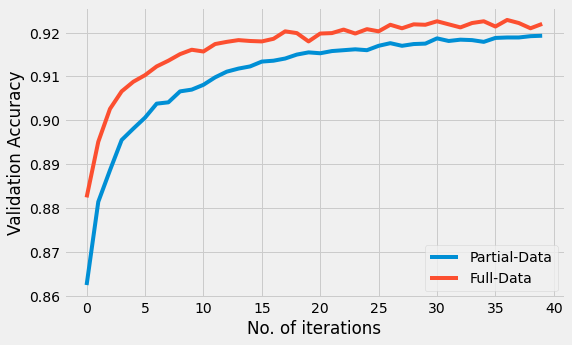

In [7]:
plt.plot(partial_data.history['val_accuracy'], label='Partial-Data'  )
plt.plot(full_data.history['val_accuracy'], label='Full-Data' , )
plt.xlabel("No. of iterations")
plt.ylabel("Validation Accuracy")
plt.legend(loc = 'lower right')

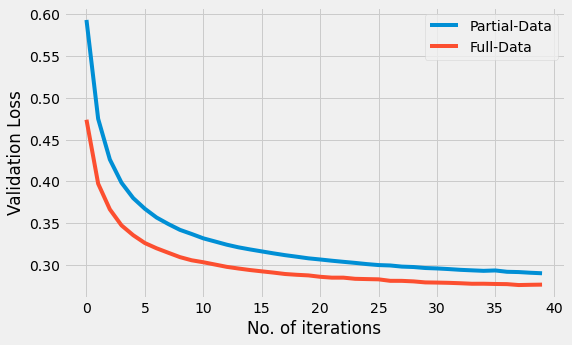

In [8]:
plt.plot(partial_data.history['val_loss'], label='Partial-Data' , )
plt.plot(full_data.history['val_loss'], label='Full-Data' , )
plt.xlabel("No. of iterations")
plt.ylabel("Validation Loss")
plt.legend(loc = 'upper right')

## EFFECT OF INCREASING HIDDEN LAYERS

### Adding one extra hidden layer

In [9]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(10 , activation = "relu"),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
one_added_layers = model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

### Adding two extra hidden layers

In [10]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(10 , activation = "relu"),
                             tf.keras.layers.Dense(20 , activation = "relu"),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
two_added_layers = model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

### Adding three extra hidden layers

In [11]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(20 , activation = "relu"),
                             tf.keras.layers.Dense(40 , activation = "relu"),
                             tf.keras.layers.Dense(20 , activation = "relu"),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
three_added_layers =  model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

### Adding five extra hidden layers

In [12]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(10 , activation = "relu"),
                             tf.keras.layers.Dense(20 , activation = "relu"),
                             tf.keras.layers.Dense(40 , activation = "relu"),
                             tf.keras.layers.Dense(20 , activation = "relu"),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
five_added_layers = model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

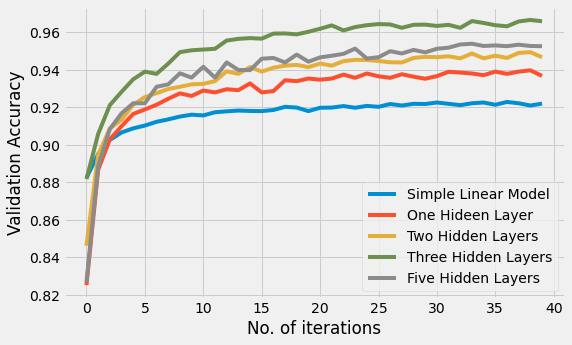

In [13]:
plt.plot(full_data.history['val_accuracy'], label='Simple Linear Model')
plt.plot(one_added_layers.history['val_accuracy'], label='One Hideen Layer')
plt.plot(two_added_layers.history['val_accuracy'], label='Two Hidden Layers')
plt.plot(three_added_layers.history['val_accuracy'], label='Three Hidden Layers')
plt.plot(five_added_layers.history['val_accuracy'], label='Five Hidden Layers')
plt.xlabel("No. of iterations")
plt.ylabel("Validation Accuracy")
plt.legend(loc = 'lower right')

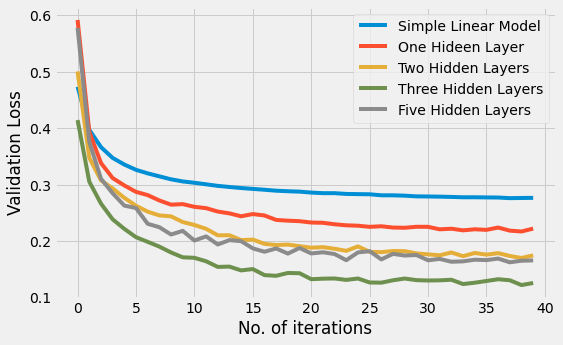

In [14]:
plt.plot(full_data.history['val_loss'], label='Simple Linear Model')
plt.plot(one_added_layers.history['val_loss'], label='One Hideen Layer')
plt.plot(two_added_layers.history['val_loss'], label='Two Hidden Layers')
plt.plot(three_added_layers.history['val_loss'], label='Three Hidden Layers')
plt.plot(five_added_layers.history['val_loss'], label='Five Hidden Layers')
plt.xlabel("No. of iterations")
plt.ylabel("Validation Loss")
plt.legend(loc = 'upper right')

## EFFECT ON UNITS(NODES) IN LAYERS

Adding small units to a 3 hidden-layers model

In [15]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(80,activation = "relu"),
                             tf.keras.layers.Dense(40,activation = "relu"),
                             tf.keras.layers.Dense(20,activation = "relu"),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
small_units = model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

Adding large units to a 3 hidden-layers model

In [16]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(512,activation = "relu"),
                             tf.keras.layers.Dense(128,activation = "relu"),
                             tf.keras.layers.Dense(64,activation = "relu"),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
large_units = model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

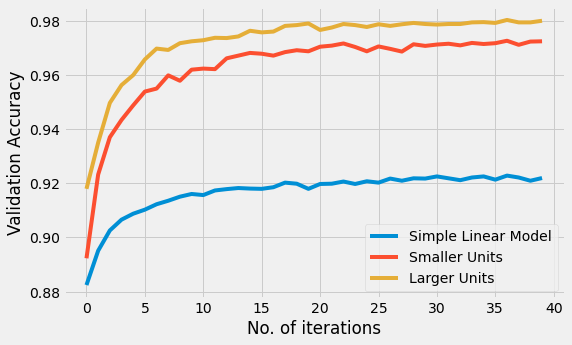

In [17]:
plt.plot(full_data.history['val_accuracy'], label='Simple Linear Model')
plt.plot(small_units.history['val_accuracy'], label='Smaller Units')
plt.plot(large_units.history['val_accuracy'], label='Larger Units')
plt.xlabel("No. of iterations")
plt.ylabel("Validation Accuracy")
plt.legend(loc = 'lower right')

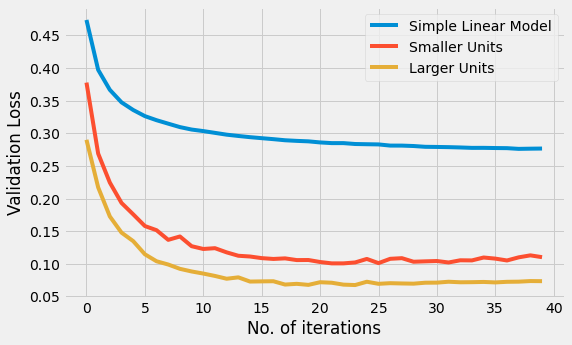

In [18]:
plt.plot(full_data.history['val_loss'], label='Simple Linear Model')
plt.plot(small_units.history['val_loss'], label='Smaller Units')
plt.plot(large_units.history['val_loss'], label='Larger Units')
plt.xlabel("No. of iterations")
plt.ylabel("Validation Loss")
plt.legend(loc = 'upper right')

## EFFECT OF BATCH NORMALIZATION 

We will add Batch Norm Layers to our last best model to check its effect on training accuracy.

In [19]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(512,activation = "relu"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(128,activation = "relu"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(64,activation = "relu"),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
bn = model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

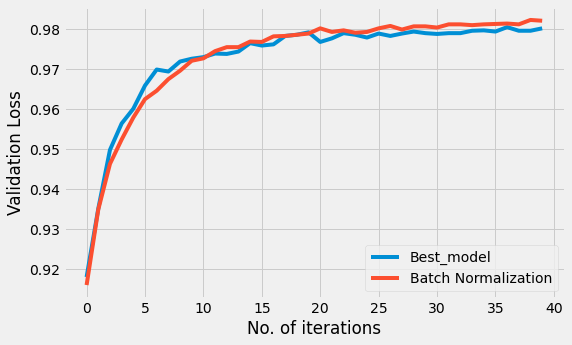

In [27]:
plt.plot(large_units.history['val_accuracy'], label='Best_model')
plt.plot(bn.history['val_accuracy'], label='Batch Normalization')
plt.xlabel("No. of iterations")
plt.ylabel("Validation Loss")
plt.legend(loc = 'lower right')

ERROR! Session/line number was not unique in database. History logging moved to new session 300


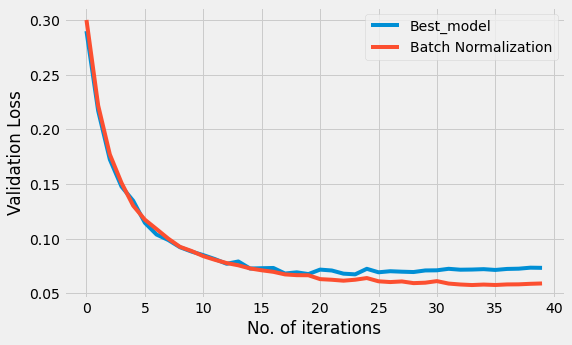

In [23]:
plt.plot(large_units.history['val_loss'], label='Best_model')
plt.plot(bn.history['val_loss'], label='Batch Normalization')
plt.xlabel("No. of iterations")
plt.ylabel("Validation Loss")
plt.legend(loc = 'upper right')

## EFFECT OF DROPOUTS:

In [24]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(512,activation = "relu"),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(128,activation = "relu"),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(64,activation = "relu"),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
dropout = model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

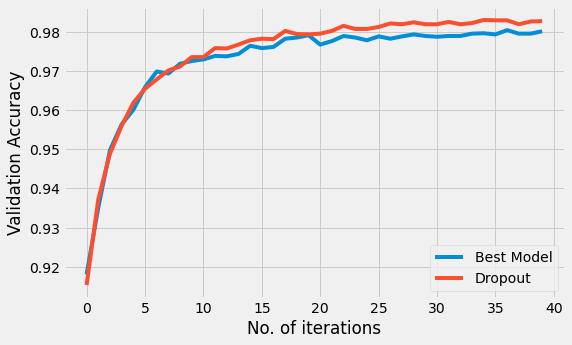

In [25]:
plt.plot(large_units.history['val_accuracy'], label='Best Model')
plt.plot(dropout.history['val_accuracy'], label='Dropout')
plt.xlabel("No. of iterations")
plt.ylabel("Validation Accuracy")
plt.legend(loc = 'lower right')

ERROR! Session/line number was not unique in database. History logging moved to new session 301


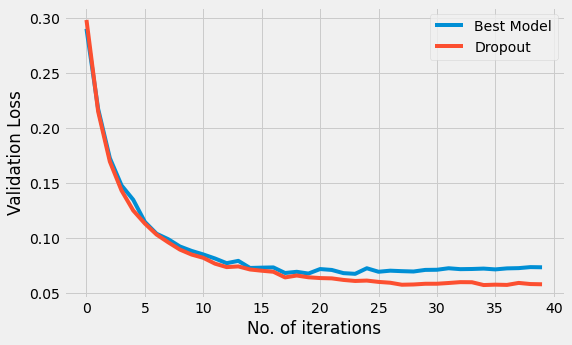

In [26]:
plt.plot(large_units.history['val_loss'], label='Best Model')
plt.plot(dropout.history['val_loss'], label='Dropout')
plt.xlabel("No. of iterations")
plt.ylabel("Validation Loss")
plt.legend(loc = 'upper right')

In [ ]:
1+1